In [1]:
import higlass as hg
import numpy as np
import pandas as pd
import bioframe
import cooltools
import cooler
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import sys
import os
from cooltools.lib.numutils import adaptive_coarsegrain
from cooltools.lib.plotting import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pyBigWig
import numpy as np
import glob
import ast
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits import axes_grid1
sys.path.append('/home1/rahmanin/start/polychrom/projects/Site_wise_occupancy/OccupancyInputCTCF/utils/')

import utils_s as utils

### importing data, Hi-c maps 

In [3]:
bonev_file = '/project/fudenber_735/GEO/bonev_2017_GSE96107/distiller-0.3.1_mm10/results/coolers/HiC_ES.mm10.mapq_30.1000.mcool'
bonev_cooler = cooler.Cooler(bonev_file+'::resolutions/10000')
res = 10_000

In [5]:
region = 'chr1:34000000-34100000'
df1 = utils.region_data_frame(ctcf, region = region)
df2 = utils.region_data_frame(motif, region = region)
overlapping_intervals = bioframe.overlap(df1, df2, how='inner', suffixes=('_1','_2'))
display(overlapping_intervals)

/home1/rahmanin/start/polychrom/projects/Site_wise_occupancy/OccupancyInputCTCF/utils/utils_s.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_dataframe['mid']=(region_dataframe.end+region_dataframe.start)/2
/home1/rahmanin/start/polychrom/projects/Site_wise_occupancy/OccupancyInputCTCF/utils/utils_s.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_dataframe['lattice_loc'] = ((region_dataframe['mid'] - region_start) // lattice_size).astype('int')
/home1/rahmanin/start/polychrom/project

,chrom_1,start_1,end_1,name_1,score_1,strand_1,mid_1,lattice_loc_1,chrom_2,start_2,end_2,name_2,score_2,pval_2,strand_2,mid_2,lattice_loc_2
0,chr1,34005641,34006016,CTCF_4reps_peak_406,57.35360,NaN,34005828.5,23,chr1,34005817,34005836,CTCF,810,403,+,34005826.5,23
1,chr1,34011003,34011576,CTCF_4reps_peak_407,81.03111,NaN,34011289.5,45,chr1,34011254,34011273,CTCF,824,430,+,34011263.5,45
2,chr1,34049624,34049965,CTCF_4reps_peak_408,17.84861,NaN,34049794.5,199,chr1,34049802,34049821,CTCF,901,607,-,34049811.5,199
3,chr1,34068201,34068742,CTCF_4reps_peak_411,111.66768,NaN,34068471.5,273,chr1,34068515,34068534,CTCF,925,680,-,34068524.5,274
4,chr1,34093645,34094093,CTCF_4reps_peak_412,95.51875,NaN,34093869.0,375,chr1,34093844,34093863,CTCF,800,386,+,34093853.5,375


In [6]:
region = 'chr1:34000000-44000000'

In [7]:
region_ctcf_motif = utils.region_data_frame(peaks_motifs, region = 'chr1:34000000-44000000')
region_ = bioframe.parse_region_string('chr1:34000000-44000000')
region_ctcf_motif.to_csv('{name}_{begin}_{end}.csv'.format(name = region_[0], begin = region_[1], end = region_[2]) ,index=False)
region_ctcf_motif

/home1/rahmanin/start/polychrom/projects/Site_wise_occupancy/OccupancyInputCTCF/utils/utils_s.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_dataframe['mid']=(region_dataframe.end+region_dataframe.start)/2
/home1/rahmanin/start/polychrom/projects/Site_wise_occupancy/OccupancyInputCTCF/utils/utils_s.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_dataframe['lattice_loc'] = ((region_dataframe['mid'] - region_start) // lattice_size).astype('int')


,chrom,start,end,strand,mid,lattice_loc
0,chr1,34005641,34006016,+,34005828.5,23
1,chr1,34011003,34011576,+,34011289.5,45
2,chr1,34049624,34049965,-,34049794.5,199
3,chr1,34068201,34068742,-,34068471.5,273
4,chr1,34093645,34094093,+,34093869.0,375
...,...,...,...,...,...,...
268,chr1,43738188,43738540,-,43738364.0,38953
269,chr1,43760145,43760509,+,43760327.0,39041
270,chr1,43762617,43762972,-,43762794.5,39051
271,chr1,43898949,43899413,+,43899181.0,39596


### CTCF & RAD21 tabels

In [4]:
# Path to the bigWig file
bw_path_rad21 = "/project/fudenber_735/GEO/justice_2020_GSE137272/mm10/GSE137272_Rad21-ChIPseq.bw"
bw_path_ctcf = "/project/fudenber_735/GEO/justice_2020_GSE137272/mm10/GSE137272_CTCF-ChIPseq.bw"

###importing ctcf peaks ####
ctcf_path='/project/fudenber_735/collaborations/karissa_2022/2022_09_features_for_RNAseq/ChIP-seq_in_WT-parental-E14'
ctcf = bioframe.read_table(ctcf_path+'/CTCF_peaks_called_on_4reps_foundInatLeast2reps_noBlacklist.bed', schema='bed')#.query(f'chrom in {clr.chromnames}')

### importing ctcf motifs ###
direct='/project/fudenber_735/motifs/mm10/jaspar/MA0139.1.tsv.gz'
motif=bioframe.read_table(direct)
motif=motif.rename(columns={0: 'chrom', 1: 'start',2:'end',3:'name',4:'score',5:'pval',6:'strand'})

### importing RAD21 
RAD21=bioframe.read_table(ctcf_path+'/RAD21_peaks_called_on_6reps_foundInatLeast3reps_noBlacklist.bed', schema='bed')#.query(f'chrom in {clr.chromnames}')
ctcf['mid']=(ctcf.end+ctcf.start)/2
RAD21['mid']=(RAD21.end+RAD21.start)/2

### overlap between peaks and motifs### 
peaks_motifs = bioframe.overlap(ctcf,motif,how='inner')
peaks_motifs=peaks_motifs.rename(columns={'strand':'strand_','strand_':'strand'})
peaks_motifs=peaks_motifs[['chrom','start','end','strand']]

# Paths to the bigWig files
bw_path_rad21 = "/project/fudenber_735/GEO/justice_2020_GSE137272/mm10/GSE137272_Rad21-ChIPseq.bw"
bw_path_ctcf = "/project/fudenber_735/GEO/justice_2020_GSE137272/mm10/GSE137272_CTCF-ChIPseq.bw"

bw_rad21 = pyBigWig.open(bw_path_rad21)
bw_ctcf = pyBigWig.open(bw_path_ctcf)






### visualizing the domain

/tmp/SLURM_24483152/ipykernel_5732/3660996135.py:7: RuntimeWarning: divide by zero encountered in log10
  im = plt.matshow(np.log10(cname),


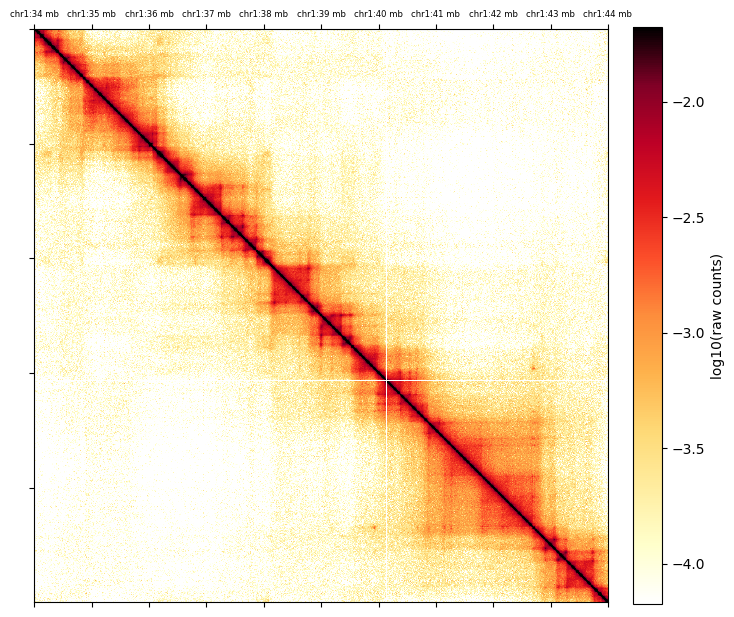

In [8]:
plt.figure(figsize=(8.1,8.10))

region = 'chr1:34000000-44000000'
region_start=bioframe.parse_region_string(region)[1]
cname = (cooler.Cooler(bonev_file+'::resolutions/'+str(res)).matrix(balance=True).fetch(region))

im = plt.matshow(np.log10(cname), 
                 vmax = np.log10(np.nanmedian(np.diag(cname,2))), 
                 vmin= np.log10(np.nanmedian(np.diag(cname,2)))-2.5, 
                 fignum=False ,cmap='fall' ); 
plt.colorbar(im ,fraction=0.046, pad=0.04, label='log10(raw counts)')
plt.xticks(utils.axes_ary(region)[0], fontsize = 6.1)
plt.gca().set_xticklabels(utils.axes_ary(region)[1])
plt.gca().set_yticklabels([])
#plt.savefig('../outputs/chrdomain_%s.png'%region)
plt.show()

### importing simulations

In [9]:
path_dict_n = {}

directory = '/scratch1/rahmanin/Site_wise_occupancy/simulations/'
for name  in glob.glob(directory+'sims/chr6/folder_*'):
    path_dict_n[name.split('chr6/')[1][:]]= name
path_dict_n = dict(sorted(path_dict_n.items()))
len(path_dict_n)

1

### path to simulation

In [6]:
path_dict_n = {}

directory = '/scratch1/rahmanin/Site_wise_occupancy/simulations/'
for names  in glob.glob(directory+'sims/chr6/folder_*'):
    name = names.split('sims/chr6/')[1][:]
    path_dict_n[name]= names
path_dict_n = dict(sorted(path_dict_n.items()))
print(len(path_dict_n))
c = 1
params = [ast.literal_eval(i) for i in name.split('folder_')[1].split('_')[1::2]]
face, back, clife, cof, life, slife, birth, pause, sep, site, mon, rep, step, vel = params
mapN = mon*site
lattice_size = 0.25 # in kb
lefs = h5py.File(path_dict_n[name]+'/LEFPositions.h5','r')["positions"]
chip = utils.chip_seq_from_lef(lefs, mapN)
with  h5py.File(path_dict_n[name]+'/LEFPositions.h5', mode='r') as myfile:
    lef_array = np.array(myfile['positions']) 
lef_array_snip = lef_array[:10]
m = utils.contact_map_from_lefs(lef_array[:],5000)
matrix = adaptive_coarsegrain(m+1, m+1, cutoff = 3, max_levels=3, min_shape = 2)
padded_matrix = np.pad(matrix, ((0, 1), (0, 1)), mode='constant')
binned_matrix = padded_matrix.reshape(100, 50, 100, 50).sum(axis=(1, 3))

1


/home1/rahmanin/.local/lib/python3.11/site-packages/cooltools/lib/numutils.py:1376: RuntimeWarning: invalid value encountered in divide
  val_cur = ar_cur / armask_cur


In [7]:
#flipped
path_dict_flipped = {}

directory = '/scratch1/rahmanin/Site_wise_occupancy/simulations/'
for names  in glob.glob(directory+'sims/folder_*'):
    name = names.split('sims/')[1][:]
    path_dict_flipped[name]= names
path_dict_flipped = dict(sorted(path_dict_flipped.items()))
print(len(path_dict_flipped))
lefs = h5py.File(path_dict_flipped[name]+'/LEFPositions.h5','r')["positions"]
chip_fliped = utils.chip_seq_from_lef(lefs, mapN)
with  h5py.File(path_dict_flipped[name]+'/LEFPositions.h5', mode='r') as myfile:
    lef_array = np.array(myfile['positions']) 
lef_array_snip = lef_array[:10]
m = utils.contact_map_from_lefs(lef_array[:],5000)
matrix = adaptive_coarsegrain(m+1, m+1, cutoff = 3, max_levels=3, min_shape = 2)
padded_matrix = np.pad(matrix, ((0, 1), (0, 1)), mode='constant')
binned_matrix_flipped = padded_matrix.reshape(100, 50, 100, 50).sum(axis=(1, 3))

1


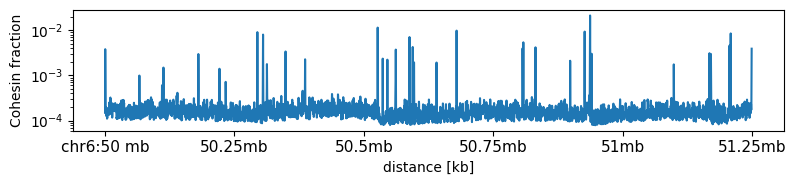

/home1/rahmanin/.local/lib/python3.11/site-packages/cooltools/lib/numutils.py:1376: RuntimeWarning: invalid value encountered in divide
  val_cur = ar_cur / armask_cur


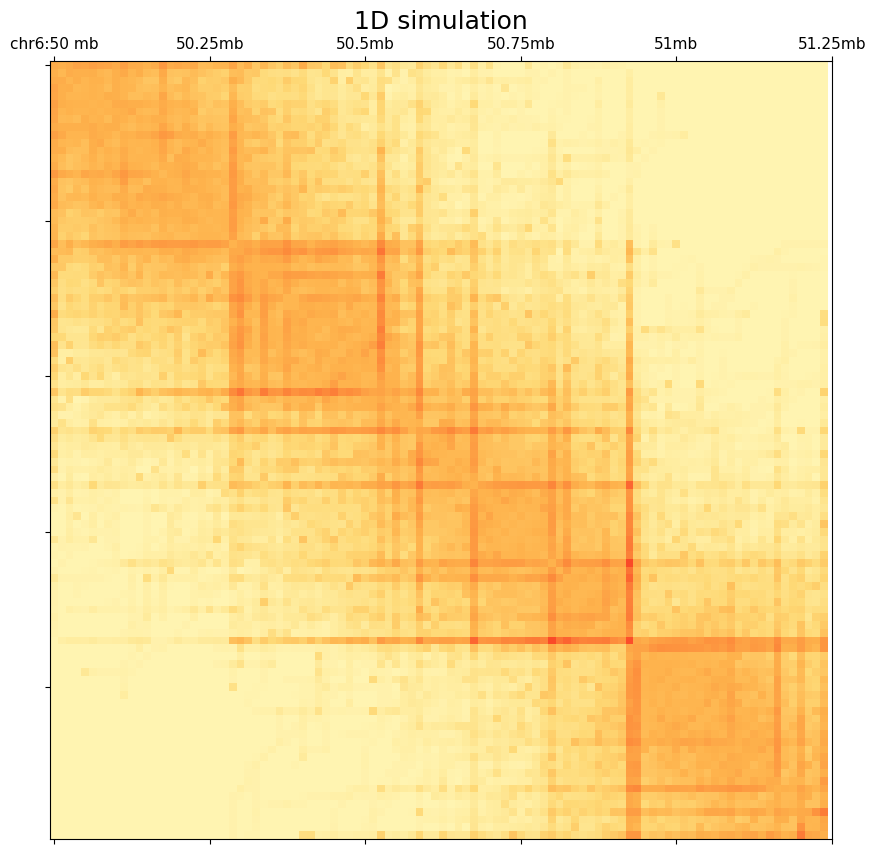

In [7]:
c = 1
for name in path_dict_n.keys():
    
    lefs = h5py.File(path_dict_n[name]+'/LEFPositions.h5','r')["positions"]
    chip = utils.chip_seq_from_lef(lefs, mapN)
    lattice_size = 0.25 # in kb
    plt.figure(figsize = (8.1,1.95))
    plt.plot(np.arange(len(chip))*lattice_size,chip/np.sum(chip), label=name)
    plt.xticks([0, 250, 500, 750, 1000, 1250],fontsize=11.1)
    plt.gca().set_xticklabels(['chr6:50 mb', '50.25mb', '50.5mb','50.75mb', '51mb','51.25mb'])
    plt.ylabel('Cohesin fraction')
    plt.yscale('log')
    plt.xlabel('distance [kb]')
    plt.tight_layout()
    plt.show()
    region = 'chr1:34000000-35250000'
    region = 'chr6:50000000-51250000'
    plt.figure(figsize=(10.1,10.1))    
    with  h5py.File(path_dict_n[name]+'/LEFPositions.h5', mode='r') as myfile:
        lef_array = np.array(myfile['positions']) 
    lef_array_snip = lef_array[:10]
    m = utils.contact_map_from_lefs(lef_array[:],5000)
    plt.title('1D simulation',fontsize=18) 
    new_m = adaptive_coarsegrain(m+1, m+1, cutoff = 3, max_levels=3, min_shape = 2)
    matrix = new_m
    padded_matrix = np.pad(matrix, ((0, 1), (0, 1)), mode='constant')
    binned_matrix = padded_matrix.reshape(100, 50, 100, 50).sum(axis=(1, 3))
    im = plt.matshow(np.log10(binned_matrix+1), vmax=8.1, vmin=2.5,cmap='fall', fignum=False)

    plt.xticks(utils.axes_ary(region)[0], fontsize = 6.1)
    plt.xticks([0, 20, 40, 60, 80, 100],fontsize=11.1)
    plt.gca().set_xticklabels(['chr6:50 mb', '50.25mb', '50.5mb','50.75mb', '51mb','51.25mb'])
    plt.gca().set_yticklabels([])
    plt.savefig('{region}.png'.format(region=region))
    plt.show()

/home1/rahmanin/.local/lib/python3.11/site-packages/cooltools/lib/numutils.py:1376: RuntimeWarning: invalid value encountered in divide
  val_cur = ar_cur / armask_cur


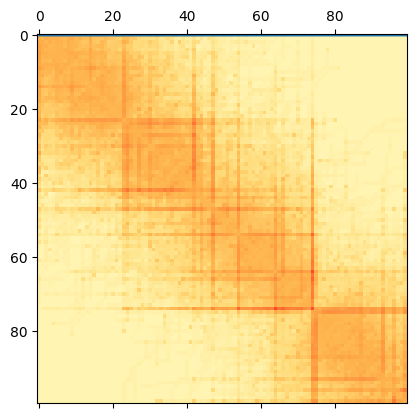

In [99]:
c = 1
for name in path_dict_n.keys():
    
    lefs = h5py.File(path_dict_n[name]+'/LEFPositions.h5','r')["positions"]
    chip = utils.chip_seq_from_lef(lefs, mapN)
    with  h5py.File(path_dict_n[name]+'/LEFPositions.h5', mode='r') as myfile:
        lef_array = np.array(myfile['positions']) 
    lef_array_snip = lef_array[:10]
    plt.plot(np.arange(len(chip))*lattice_size,chip/np.sum(chip), label=name)
    m = utils.contact_map_from_lefs(lef_array[:],5000)
    matrix = adaptive_coarsegrain(m+1, m+1, cutoff = 3, max_levels=3, min_shape = 2)
    padded_matrix = np.pad(matrix, ((0, 1), (0, 1)), mode='constant')
    binned_matrix = padded_matrix.reshape(100, 50, 100, 50).sum(axis=(1, 3))
    im = plt.matshow(np.log10(binned_matrix+1), vmax=8.1, vmin=2.5,cmap='fall', fignum=False)

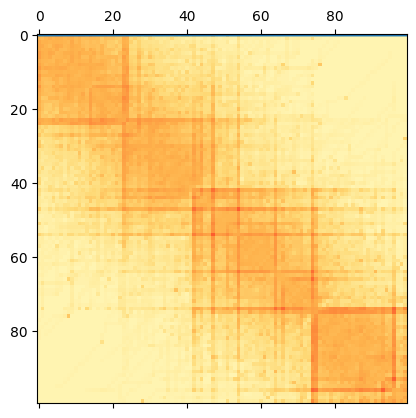

In [106]:
c = 1
for name in path_dict_flipped.keys():
    
    lefs = h5py.File(path_dict_flipped[name]+'/LEFPositions.h5','r')["positions"]
    chip_fliped = utils.chip_seq_from_lef(lefs, mapN)
    with  h5py.File(path_dict_flipped[name]+'/LEFPositions.h5', mode='r') as myfile:
        lef_array = np.array(myfile['positions']) 
    lef_array_snip = lef_array[:10]
    plt.plot(np.arange(len(chip))*lattice_size,chip/np.sum(chip), label=name)
    m = utils.contact_map_from_lefs(lef_array[:],5000)
    matrix = adaptive_coarsegrain(m+1, m+1, cutoff = 3, max_levels=3, min_shape = 2)
    padded_matrix = np.pad(matrix, ((0, 1), (0, 1)), mode='constant')
    binned_matrix_flipped = padded_matrix.reshape(100, 50, 100, 50).sum(axis=(1, 3))
    im = plt.matshow(np.log10(binned_matrix_flipped+1), vmax=8.1, vmin=2.5,cmap='fall', fignum=False)

/tmp/SLURM_24483152/ipykernel_5036/1818882946.py:44: RuntimeWarning: divide by zero encountered in log10
  np.log10(cname),


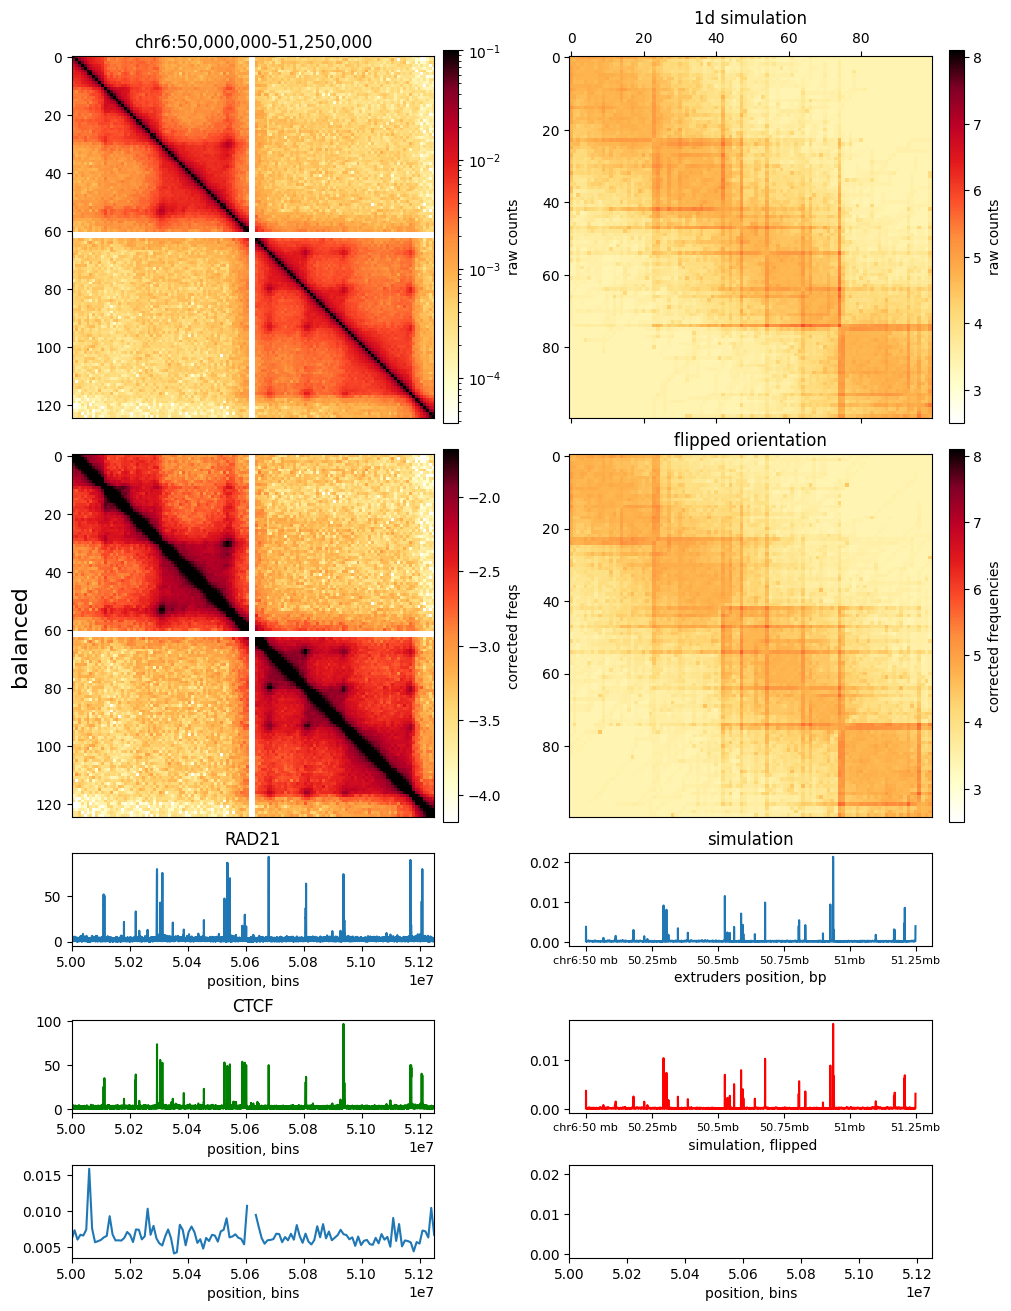

In [17]:
##### determine the region

region = "chr6:50000000-51250000"
region_ = bioframe.parse_region_string(region)
chrom = region_[0]
start_reg = region_[1]
end_reg = region_[2]

values_rad21 = np.nan_to_num(bw_rad21.values(chrom, start_reg, end_reg))
#bw_rad21.close()
values_ctcf = np.nan_to_num(bw_ctcf.values(chrom, start_reg, end_reg))
### layout for plot ###
plt_width=4
f, axs = plt.subplots(
    figsize=(plt_width + plt_width + 2, plt_width + plt_width + 5),
    ncols=4,
    nrows=5,
    gridspec_kw={'height_ratios':[4,4,1,1,1],"wspace":0.01,'width_ratios':[1,.04,1,.04]},
    constrained_layout=True
)

norm = LogNorm(vmax=0.1)
norm_raw = LogNorm(vmin=1, vmax=10_000)

##### raw data
clr = cooler.Cooler(bonev_file + '::resolutions/' + str(res))
cname = clr.matrix(balance=True).fetch(region)
ax = axs[0,0]
im = ax.matshow(
    clr.matrix().fetch(region),
    norm=norm,
    cmap='fall',
);
ax.set_title(f'{chrom}:{start_reg:,}-{end_reg:,}')
ax.xaxis.set_visible(False)
ax.xaxis.set_visible(False)

cax = axs[0,1]
plt.colorbar(im, cax=cax, label='raw counts')

##### Balanced data
ax = axs[1,0]
im = ax.matshow(
    np.log10(cname),
    cmap='fall',
    vmax=np.log10(np.nanmedian(np.diag(cname, 2))),
    vmin=np.log10(np.nanmedian(np.diag(cname, 2))) - 2.5,
);
ax.xaxis.set_visible(False)
ax.set_ylabel('balanced', fontsize=16)

cax = axs[1,1]
plt.colorbar(im, cax=cax, label='corrected freqs')

### plotting chip-seqs
ax1 = axs[2,0]
weights = clr.bins().fetch(region)['weight'].values
ax1.plot(np.arange(start_reg, end_reg), values_rad21,
    
)
ax1.set_xlim([start_reg, end_reg])
ax1.set_xlabel('position, bins')
ax1.set_title('RAD21')
ax1 = axs[2,1]
ax1.set_visible(False)

ax1 = axs[3,0]
weights = clr.bins().fetch(region)['weight'].values
ax1.plot(
    
    np.arange(start_reg, end_reg), values_ctcf, color='green', label='CTCF ChIP-seq'
    
#    weights
)
ax1.set_xlim([start_reg, end_reg])
ax1.set_xlabel('position, bins')
ax1.set_title('CTCF')
ax1 = axs[3,1]
ax1.set_visible(False)

ax1 = axs[4,0]
weights = clr.bins().fetch(region)['weight'].values
ax1.plot(np.linspace(start_reg, end_reg, len(weights)),
    weights)
ax1.set_xlim([start_reg, end_reg])
ax1.set_xlabel('position, bins')

ax1 = axs[4,1]
ax1.set_visible(False)
#ax1.set_visible()

##### simulated map 1d
ax = axs[0,2]
im = ax.matshow(np.log10(binned_matrix+1), vmax=8.1, vmin=2.5,cmap='fall')
ax.set_title('1d simulation')
cax = axs[0,3]
plt.colorbar(im, cax=cax, label='raw counts');

##### simulated data 3d 
ax = axs[1,2]
im = ax.matshow(np.log10(binned_matrix_flipped+1), vmax=8.1, vmin=2.5,cmap='fall');
ax.xaxis.set_visible(False)
ax.set_title('flipped orientation')
cax = axs[1,3]
plt.colorbar(im, cax=cax, label='corrected frequencies');

ax1 = axs[2,2]
#weights = clr.bins().fetch(region)['weight'].values

ax1.plot(np.arange(len(chip))*lattice_size,chip/np.sum(chip))
#format_ticks(ax1, y=False, rotate=False)
#ax1.set_xlim(start_reg, end_reg);
ax1.set_xlabel('extruders position, bp')
ax1.set_title('simulation')
#ax1.set_xticks(utils.axes_ary(region)[0])
ax1.set_xticks([0, 250, 500, 750, 1000, 1250])
ax1.set_xticklabels(['chr6:50 mb', '50.25mb', '50.5mb','50.75mb', '51mb','51.25mb'], fontsize =8.1)
ax1 = axs[2,3]
ax1.set_visible(False)


ax1 = axs[3,2]
#ax1.plot(np.arange(start_reg, end_reg), values_rad21, color='blue', label='Rad21 ChIP-seq')
ax1.plot(np.arange(len(chip_fliped))*lattice_size,chip_fliped/np.sum(chip_fliped), color='red')
#ax1.set_xlim([start_reg, end_reg])
ax1.set_xlabel('extruders position')
ax1.set_xlabel(' simulation, flipped')
ax1.set_xticks([0, 250, 500, 750, 1000, 1250])
ax1.set_xticklabels(['chr6:50 mb', '50.25mb', '50.5mb','50.75mb', '51mb','51.25mb'], fontsize =8.1)
ax1 = axs[3,3]
ax1.set_visible(False)


ax1 = axs[4,2]
weights = clr.bins().fetch(region)['weight'].values
ax1.plot(np.arange(len(chip))*lattice_size,chip/np.sum(chip))
ax1.set_xlim([start_reg, end_reg])
ax1.set_xlabel('position, bins')

ax1 = axs[4,3]
ax1.set_visible(False)

plt.savefig('plots.png')
plt.show()